<a href="https://colab.research.google.com/github/arianza1210/Data_Analyst/blob/main/Prediksi_Jenis_Kelamin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/irfani/Jenis-Kelamin/master/data/data-pemilih-kpu.csv", encoding ='utf-8-sig')

In [5]:
df.shape

(13137, 2)

In [6]:
df.head(5)

,nama,jenis_kelamin
0,ERWIN TJAHJONO,Laki-Laki
1,DAVIANDRIE ANDIKA BAHROENY,Laki-Laki
2,ELAN KURNIAWAN,Laki-Laki
3,AYU DWI CAHYANING MUKTI,Perempuan
4,WAHYOEDIN,Laki-Laki


In [7]:
df.tail(5)

,nama,jenis_kelamin
13132,HERMANSYAH,Laki-Laki
13133,SITA.HJ,Perempuan
13134,MASNI TAMBUNAN,Perempuan
13135,MARJANEDI,Laki-Laki
13136,NGALIMAN,Laki-Laki


cleansing data

In [11]:
#mengecek apakah ada data yang null
df.isnull().values.any()

True

In [12]:
# mengecek jumlah baris data yang null
len(df[pd.isnull(df).any(axis=1)])

187

In [13]:
# menghapus baris yang null
df= df.dropna(how='all')
len(df[pd.isnull(df).any(axis=1)])

0

In [15]:
#cek dimensi setelah di cleansing
df.shape


(12950, 2)

In [16]:
#mengubah JK dri text menjadi angka (L=1,P=0)
jk={"Laki-Laki" : 1, "Perempuan" : 0}
df["jenis_kelamin"]= df["jenis_kelamin"].map(jk)

In [17]:
df.head()

,nama,jenis_kelamin
0,ERWIN TJAHJONO,1
1,DAVIANDRIE ANDIKA BAHROENY,1
2,ELAN KURNIAWAN,1
3,AYU DWI CAHYANING MUKTI,0
4,WAHYOEDIN,1


In [19]:
#menghitung jumlah L dan P
num_obs= len(df)
num_l= len(df.loc[df['jenis_kelamin']==1])
num_p= len(df.loc[df['jenis_kelamin']==0])
print("jumlah Laki-Laki : {0} ({1:2.2f}%)".format(num_l, (num_l/num_obs)*100))
print("jumlah Perrempuan : {0} ({1:2.2f}%)".format(num_p, (num_p/num_obs)*100))


jumlah Laki-Laki : 6162 (47.58%)
jumlah Perrempuan : 6788 (52.42%)


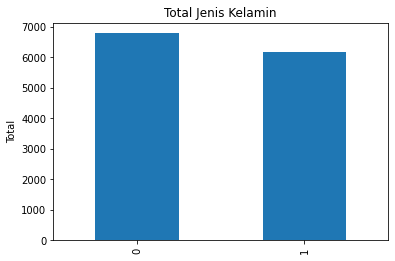

In [23]:
#visualisasi Jumlah Jenis Kelamin
import matplotlib.pyplot as plt
v1=df['jenis_kelamin'].value_counts()
v1.plot(kind='bar')
plt.title('Total Jenis Kelamin')
plt.ylabel('Total')
plt.show()

Split Dataset

In [24]:
from sklearn.model_selection import train_test_split

feature_col_name= ["nama"]
predicted_class_name = ["jenis_kelamin"]

x=df[feature_col_name].values
y=df[predicted_class_name].values
split_test_size = 0.30

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=split_test_size)

dataset telah dibagi menjadi 2 bagian training 70% dan testing 30%

In [30]:

print("Data Training Laki-Laki : {0}".format(len(y_train[y_train[:]==1])))
print("Data Training Perempuan : {0}".format(len(y_train[y_train[:]==0])))
print(" ")
print("Data Training Laki-Laki : {0}".format(len(y_test[y_test[:]==1])))
print("Data Training Perempuan : {0}".format(len(y_test[y_test[:]==0])))

Data Training Laki-Laki : 4318
Data Training Perempuan : 4747
 
Data Training Laki-Laki : 1844
Data Training Perempuan : 2041


**Feature Extraction**
Proses features extraction, berpengaruh terhadap hasil akurasi yang didapatkan nantinya. Disini saya kan menggunakan metode simple yaitu CountVectorizer yang akan membuat matrix frekwensi kemunculan dari suatu karakter di tiap nama yang diberikan, dengan opsi analisa ngram_range 2 - 6 hanya di dalam satu kata saja. Misal Muhammad Irfani Sahnur, menghasilkan n-gram :

mu
ham
mad
nur
dst


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(2,6))
vectorizer.fit(x_train.ravel())
X_train = vectorizer.transform(x_train.ravel())
X_test = vectorizer.transform(x_test.ravel())

**Percobaan pertama menggunakan metode Logistic Regression**

---



In [35]:
from sklearn.linear_model import LogisticRegression

Lr= LogisticRegression ()
Lr.fit(X_train,y_train.ravel())

LogisticRegression()

In [37]:
print("Akurasi Training : ",Lr.score(X_train, y_train))
print("Akurasi Testing : ", Lr.score(X_test,y_test))


Akurasi Training :  0.9961389961389961
Akurasi Testing :  0.9405405405405406


Akurasi prediksi menggunakan Logististic Regression adalah **94,05%**




**detail akurasi metrik**

In [39]:
from sklearn import metrics
Lr_predict=Lr.predict(X_test)

print("Accuracy : {0:.4f}".format(metrics.accuracy_score(y_test,Lr_predict)))
print(metrics.confusion_matrix(y_test,Lr_predict,labels=[1,0]))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_test,Lr_predict,labels=[1,0]))

Accuracy : 0.9405
[[1746   98]
 [ 133 1908]]
 
Classification Report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94      1844
           0       0.95      0.93      0.94      2041

    accuracy                           0.94      3885
   macro avg       0.94      0.94      0.94      3885
weighted avg       0.94      0.94      0.94      3885



In [40]:
#testing Prediksi Jenis Kelamin
Jk_label={1:"Laki-Laki", 0:"Perempuan"}
test_predict = vectorizer.transform(["pandi barep arianza"])
res = Lr.predict(test_predict)

print(Jk_label[int(res)])

Laki-Laki


**Percobaan kedua menggunakan metode Naive Bayes**

---



In [47]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
import numpy as np
clf_nb = Pipeline([('vect', CountVectorizer(analyzer = 'char_wb', ngram_range=(2,6))),
                     ('Lr', MultinomialNB()),
])
clf_nb=clf_nb.fit(x_train.ravel(),y_train.ravel())
predicted= clf_nb.predict(x_test.ravel())
np.mean(predicted==y_test.ravel())

0.931016731016731

akurasi yang didapatkan menggunakan naive bayes yaitu **93,10%** 




In [48]:
result=clf_nb.predict(["shelya renanda"])
print(Jk_label[result[0]])

Perempuan


**Percobaan Ketiga menggunakan Random Forest**

---



In [52]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = Pipeline([('vect', CountVectorizer(analyzer = 'char_wb', ngram_range=(2,6))),
                     ('Lr', RandomForestClassifier()),
])
clf_rf=clf_rf.fit(x_train.ravel(),y_train.ravel())
predicted=clf_rf.predict(x_test.ravel())
np.mean(predicted==y_test.ravel())

0.9328185328185328

setelah menggunakan Random Forest akurasi yang didapatkan sebesar **93,28%**.

In [53]:
result = clf_rf.predict(['bisma septian'])
print(Jk_label[result[0]])

Laki-Laki


In [54]:
result = clf_rf.predict(['abi perdana khusuma'])
print(Jk_label[result[0]])

Laki-Laki
